### About Dataset

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available

Make two prediction:
* Fuel Type   
* capacity_mw 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [2]:
data = pd.read_csv("global_power_plant.csv")
data.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


#### splitting the dataset into 2 as we have two target variable

In [3]:
df = data.drop('primary_fuel',axis=1)
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,NaN,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dt = data.drop('capacity_mw',axis=1)
dt.head(3)

,country,country_long,name,gppd_idnr,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,NaN,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,NaN,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking for null values

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [6]:
dt.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [7]:
df.shape

(908, 24)

#### Columns 'other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh' doesn't have any values and 'other_fuel1' also have null values, so its better to drop those columns initially and proceed

In [8]:
df = df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','year_of_capacity_data','generation_data_source'],axis=1)
df.head(3)

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN


In [9]:
dt = dt.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country','country_long','year_of_capacity_data','generation_data_source'],axis=1)
dt.head(3)

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   capacity_mw          908 non-null    float64
 3   latitude             862 non-null    float64
 4   longitude            862 non-null    float64
 5   commissioning_year   528 non-null    float64
 6   owner                342 non-null    object 
 7   source               908 non-null    object 
 8   url                  908 non-null    object 
 9   geolocation_source   889 non-null    object 
 10  generation_gwh_2013  384 non-null    float64
 11  generation_gwh_2014  401 non-null    float64
 12  generation_gwh_2015  425 non-null    float64
 13  generation_gwh_2016  437 non-null    float64
 14  generation_gwh_2017  443 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 908 non-null    object 
 1   gppd_idnr            908 non-null    object 
 2   latitude             862 non-null    float64
 3   longitude            862 non-null    float64
 4   primary_fuel         908 non-null    object 
 5   commissioning_year   528 non-null    float64
 6   owner                342 non-null    object 
 7   source               908 non-null    object 
 8   url                  908 non-null    object 
 9   geolocation_source   889 non-null    object 
 10  generation_gwh_2013  384 non-null    float64
 11  generation_gwh_2014  401 non-null    float64
 12  generation_gwh_2015  425 non-null    float64
 13  generation_gwh_2016  437 non-null    float64
 14  generation_gwh_2017  443 non-null    float64
dtypes: float64(8), object(7)
memory usage: 1

In [12]:
df.shape

(908, 15)

#### Replacing the null values

In [13]:
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())
df["longitude"] = df['longitude'].fillna(df['longitude'].mean())
df["commissioning_year"] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df["generation_gwh_2013"] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df["generation_gwh_2014"] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df["generation_gwh_2015"] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df["generation_gwh_2016"] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df["generation_gwh_2017"] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

df["owner"] = df["owner"].fillna(df["owner"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [14]:
dt["latitude"] = dt['latitude'].fillna(dt['latitude'].mean())
dt["longitude"] = dt['longitude'].fillna(dt['longitude'].mean())
dt["commissioning_year"] = dt['commissioning_year'].fillna(dt['commissioning_year'].mean())
dt["generation_gwh_2013"] = dt['generation_gwh_2013'].fillna(dt['generation_gwh_2013'].mean())
dt["generation_gwh_2014"] = dt['generation_gwh_2014'].fillna(dt['generation_gwh_2014'].mean())
dt["generation_gwh_2015"] = dt['generation_gwh_2015'].fillna(dt['generation_gwh_2015'].mean())
dt["generation_gwh_2016"] = dt['generation_gwh_2016'].fillna(dt['generation_gwh_2016'].mean())
dt["generation_gwh_2017"] = dt['generation_gwh_2017'].fillna(dt['generation_gwh_2017'].mean())

dt["owner"] = dt["owner"].fillna(dt["owner"].mode()[0])
dt["geolocation_source"] = dt["geolocation_source"].fillna(dt["geolocation_source"].mode()[0])

In [15]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [16]:
dt.isnull().sum()

name                   0
gppd_idnr              0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

#### All the null values are replaced by mean and mode

#### Using Label encoding technique to convert categorical values to numerical

In [17]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
for column in df:
    df[column] = label_enc.fit_transform(df[column])
df.head(5)

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,9,731,143,66,229,109,128,1,252,253,267,270,272
1,1,520,180,594,234,51,258,174,173,2,252,253,267,270,272
2,2,854,122,421,8,51,2,21,205,2,252,253,267,270,272
3,3,0,204,547,808,59,5,22,58,2,158,157,198,199,178
4,4,1,345,424,704,70,5,22,58,2,228,275,351,362,341


In [18]:
label_enc = LabelEncoder()
for column in dt:
    dt[column] = label_enc.fit_transform(dt[column])
dt.head(5)

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,658,731,143,6,66,229,109,128,1,252,253,267,270,272
1,1,520,594,234,1,51,258,174,173,2,252,253,267,270,272
2,2,854,421,8,7,51,2,21,205,2,252,253,267,270,272
3,3,0,547,808,2,59,5,22,58,2,158,157,198,199,178
4,4,1,424,704,1,70,5,22,58,2,228,275,351,362,341


### EDA

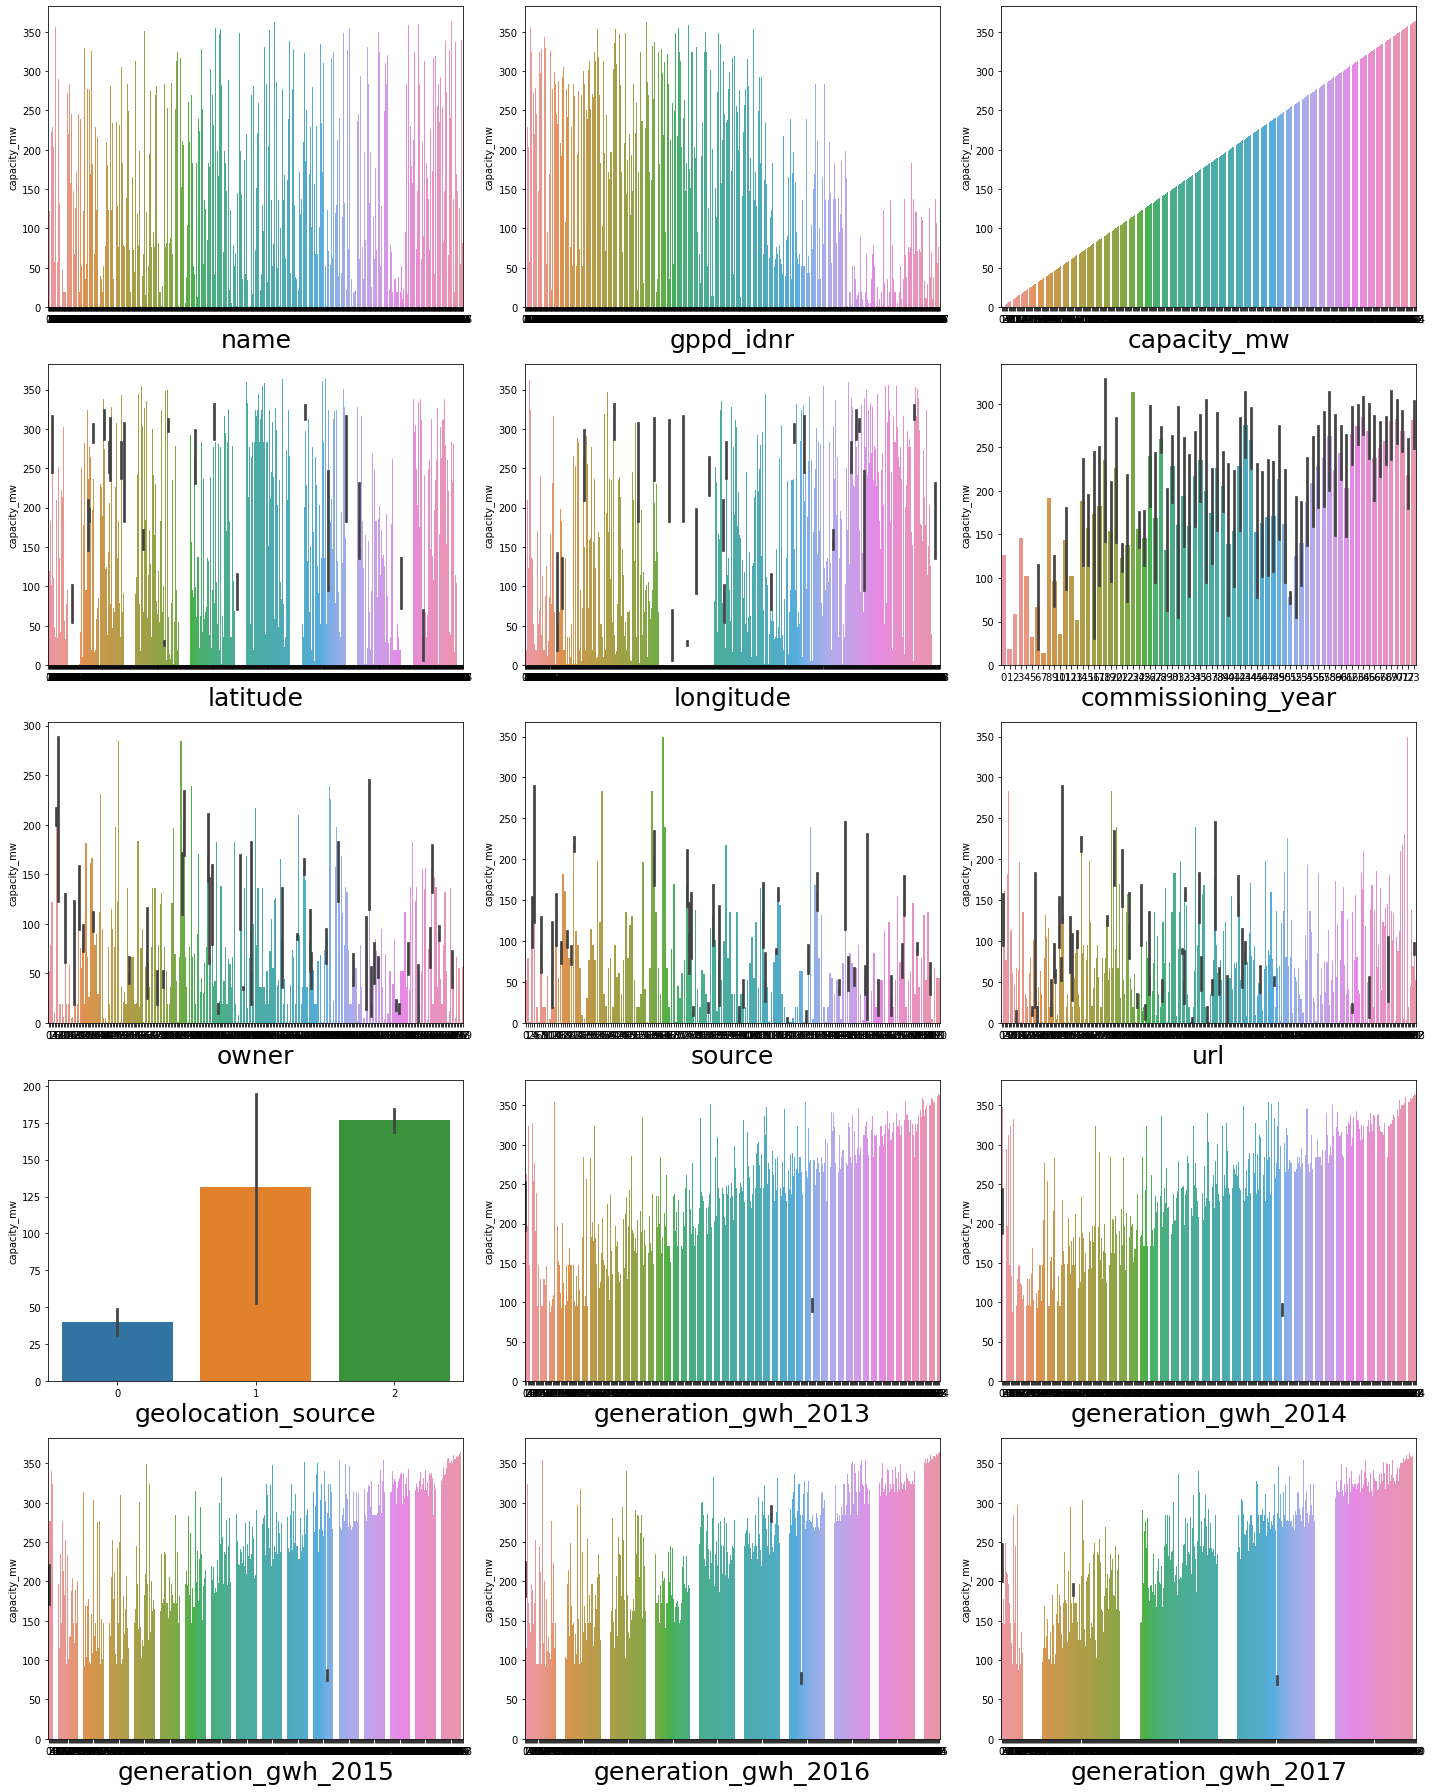

In [19]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.barplot(x=df[column],y=df['capacity_mw'],data=df)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

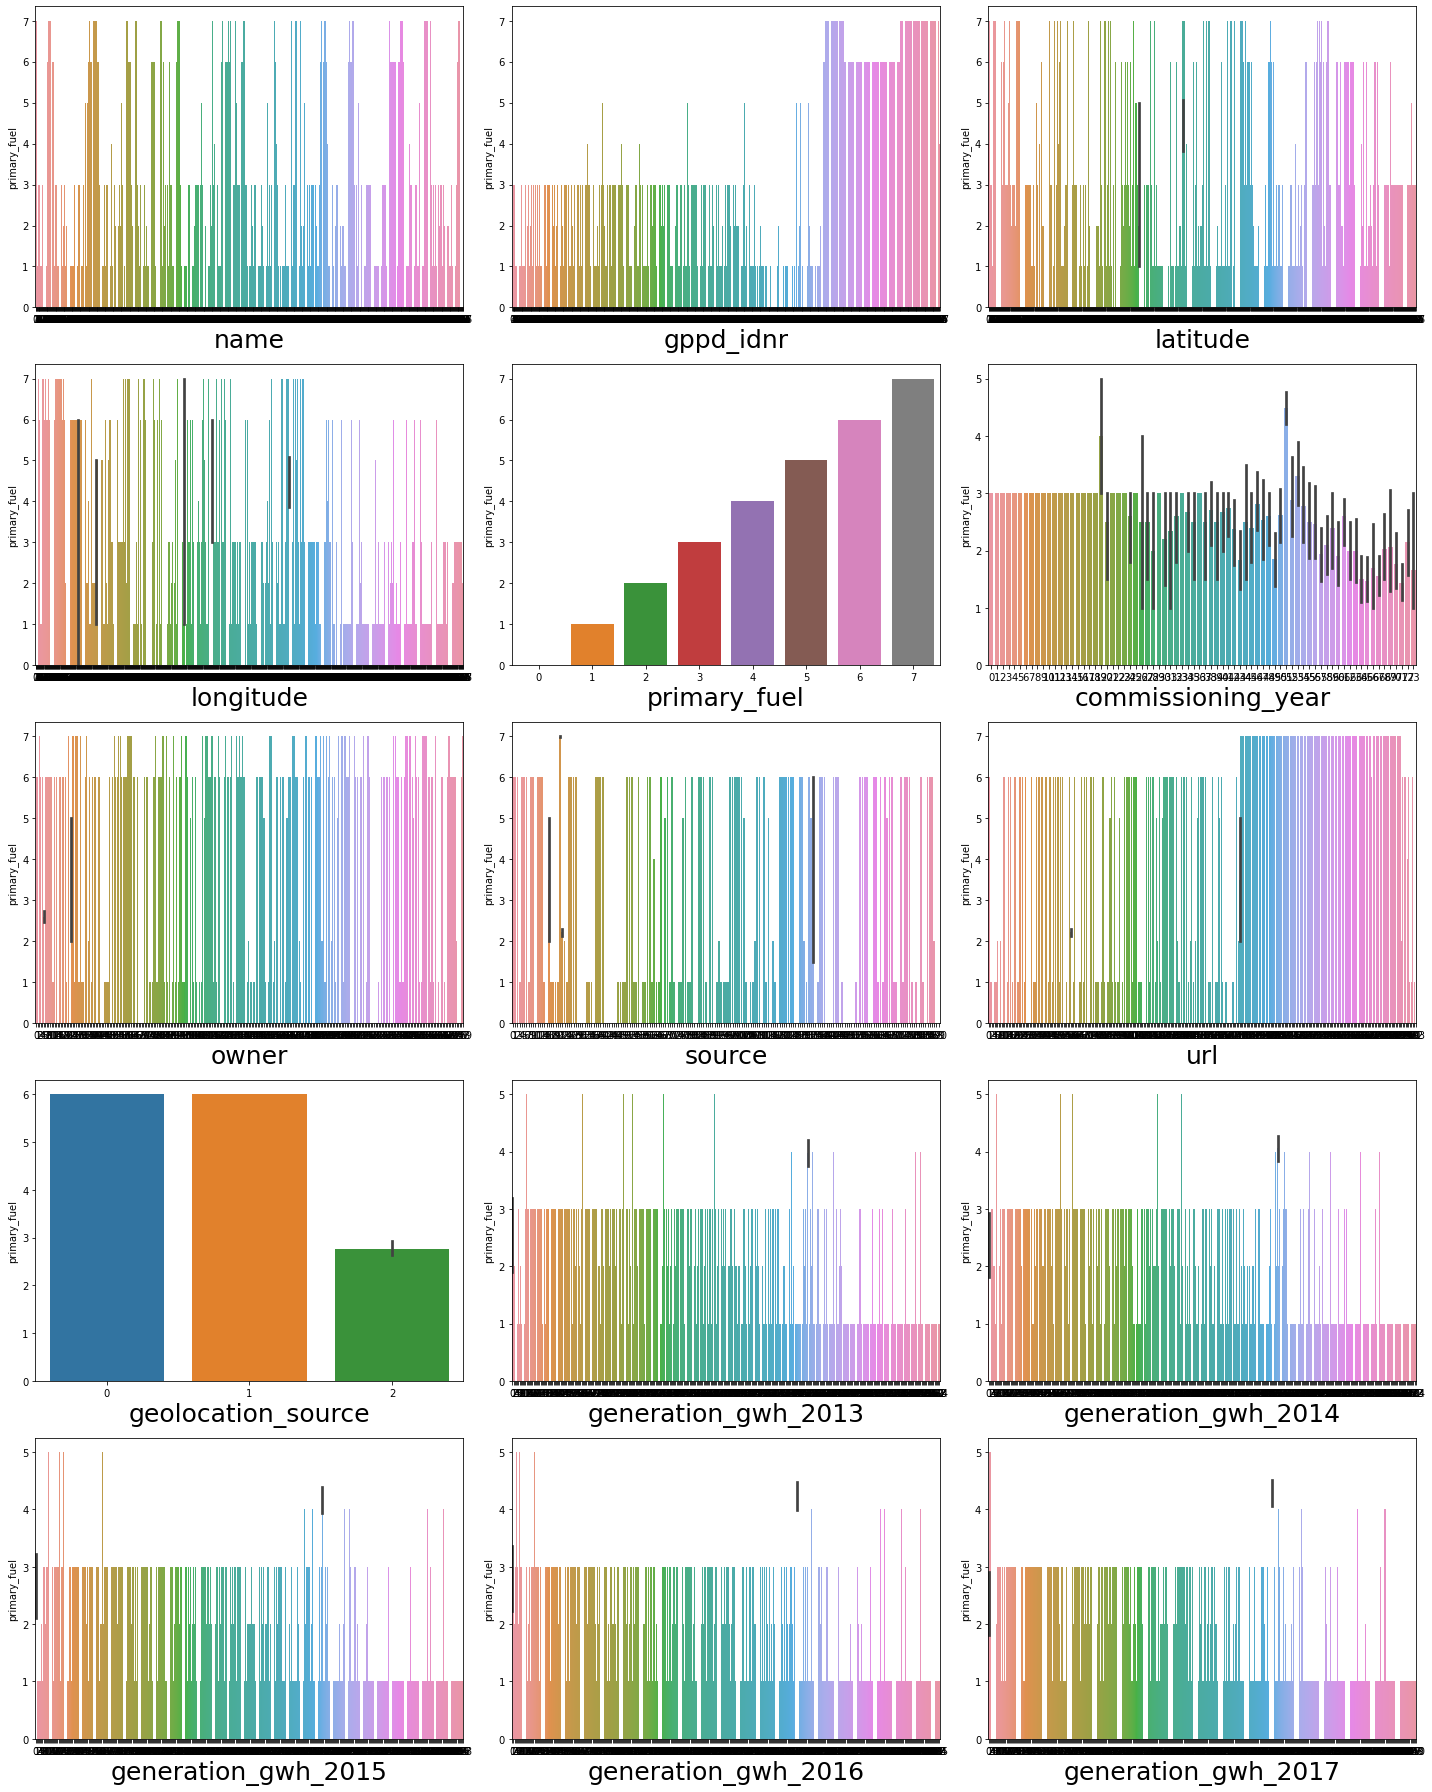

In [20]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in dt:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.barplot(x=dt[column],y=dt['primary_fuel'],data=dt)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Checking the correlation

In [21]:
df.corr()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.336792,0.012749,-0.135774,0.035569,-0.039564,0.098944,-0.013801,0.042711,0.035528,0.050131,0.048980,0.035561,0.032634,0.050657
gppd_idnr,0.336792,1.000000,-0.566669,-0.100887,-0.396645,0.025870,0.630597,0.416575,0.596994,-0.464119,0.354518,0.349401,0.344224,0.319660,0.311168
capacity_mw,0.012749,-0.566669,1.000000,0.078277,0.343447,0.270652,-0.496685,-0.393152,-0.349308,0.423886,-0.027932,-0.013597,-0.017148,0.002238,0.004315
latitude,-0.135774,-0.100887,0.078277,1.000000,-0.047595,0.083514,-0.069743,0.053840,-0.127336,-0.210730,0.029079,0.065672,0.060229,0.086324,0.047967
longitude,0.035569,-0.396645,0.343447,-0.047595,1.000000,0.098817,-0.320915,-0.272860,-0.309788,0.304302,-0.121506,-0.131237,-0.148031,-0.095822,-0.115977
commissioning_year,-0.039564,0.025870,0.270652,0.083514,0.098817,1.000000,0.000717,0.010774,-0.001213,0.001382,0.146404,0.157528,0.146641,0.184374,0.148159
owner,0.098944,0.630597,-0.496685,-0.069743,-0.320915,0.000717,1.000000,0.769652,0.419976,-0.384993,0.255206,0.251786,0.253531,0.253767,0.255998
source,-0.013801,0.416575,-0.393152,0.053840,-0.272860,0.010774,0.769652,1.000000,0.160379,-0.505823,0.201454,0.198754,0.200132,0.200318,0.202079
url,0.042711,0.596994,-0.349308,-0.127336,-0.309788,-0.001213,0.419976,0.160379,1.000000,-0.019150,0.213298,0.210440,0.211898,0.212095,0.213960
geolocation_source,0.035528,-0.464119,0.423886,-0.210730,0.304302,0.001382,-0.384993,-0.505823,-0.019150,1.000000,-0.162204,-0.160030,-0.161140,-0.161289,-0.162708


#### generation_gwh_2013,generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,generation_gwh_2017,name and latitude have negligible correlation with 'primary_fuel' and 'capacity_mw'

#### Correlation visualization

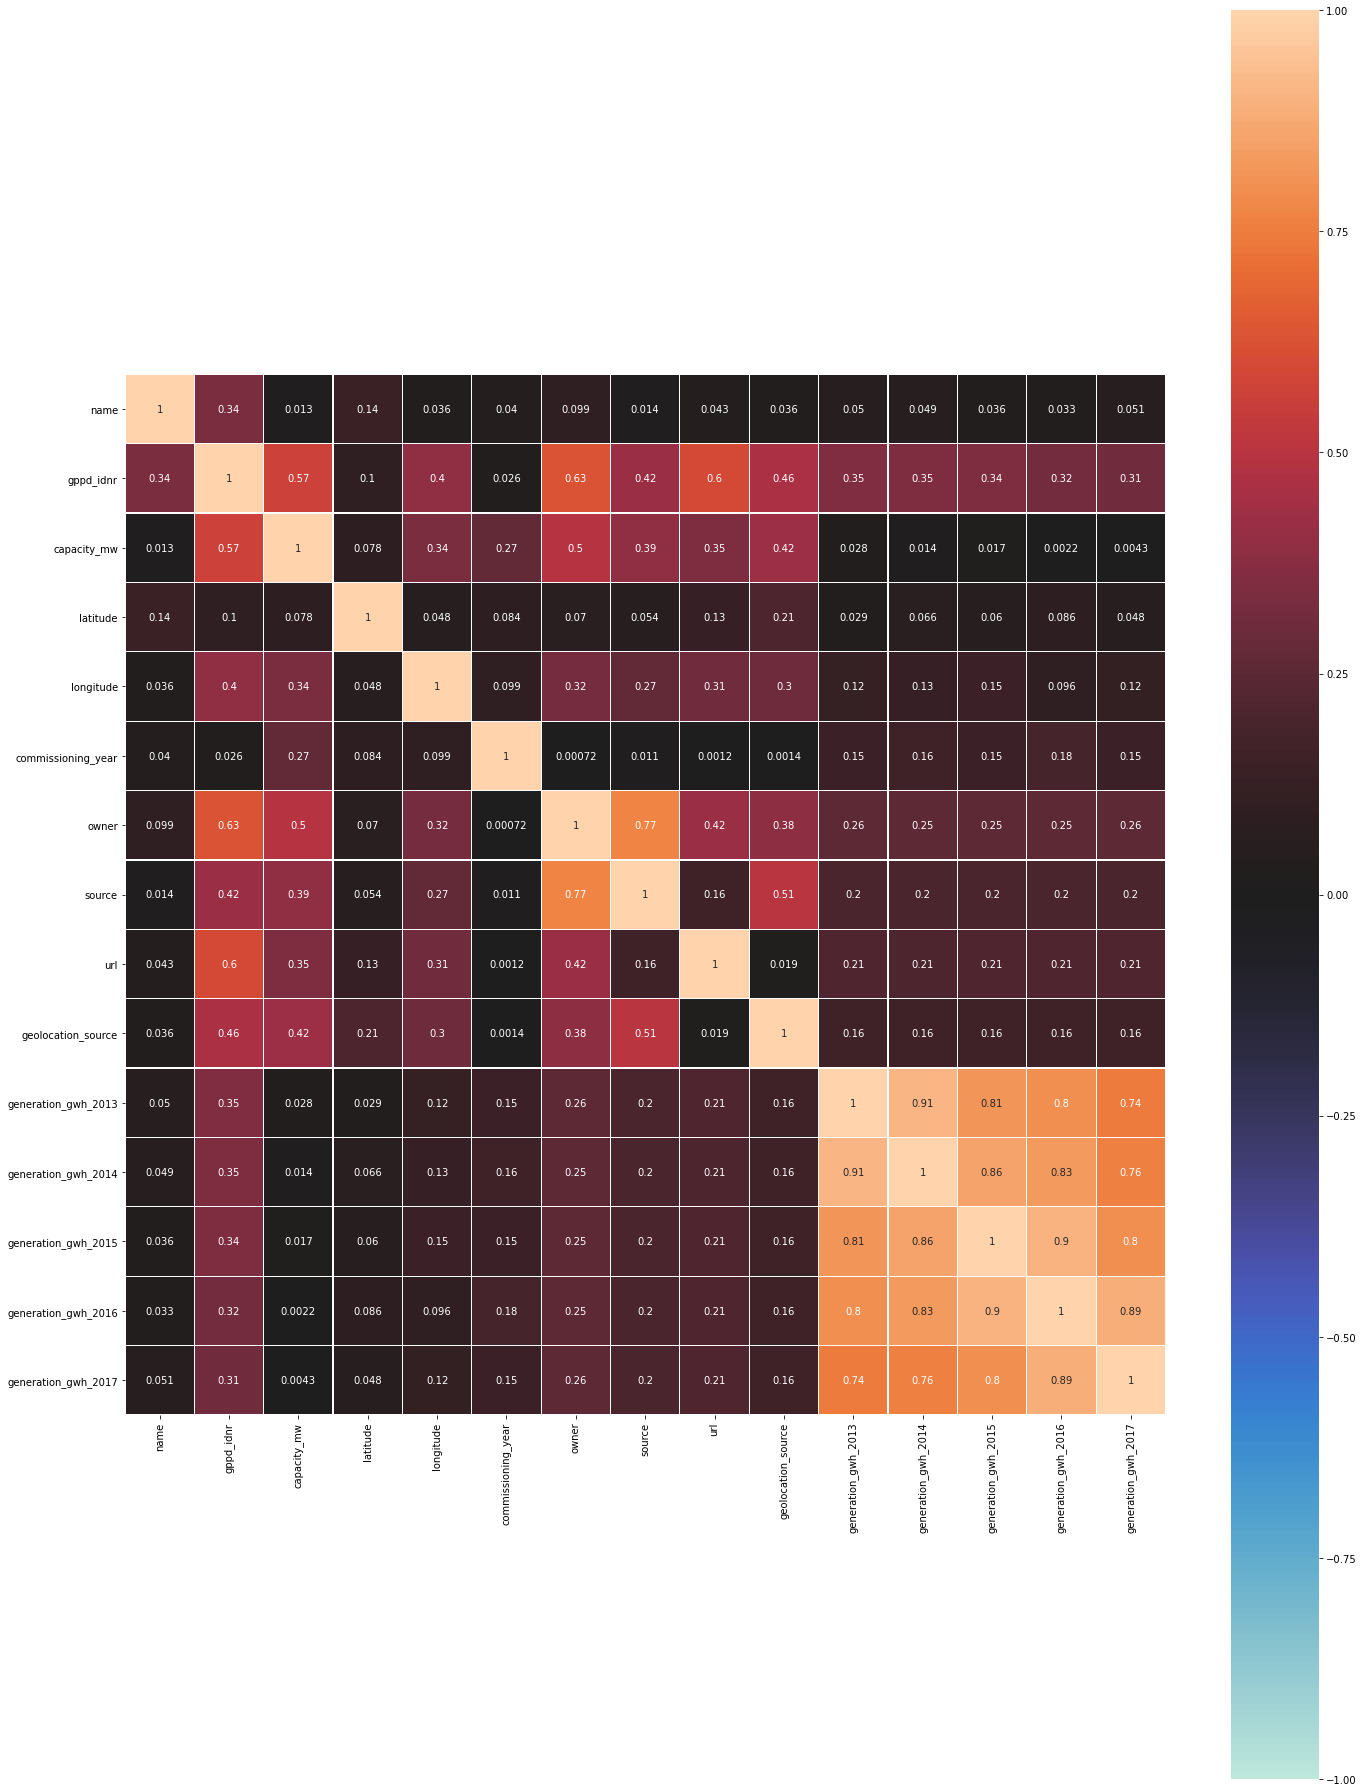

In [22]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

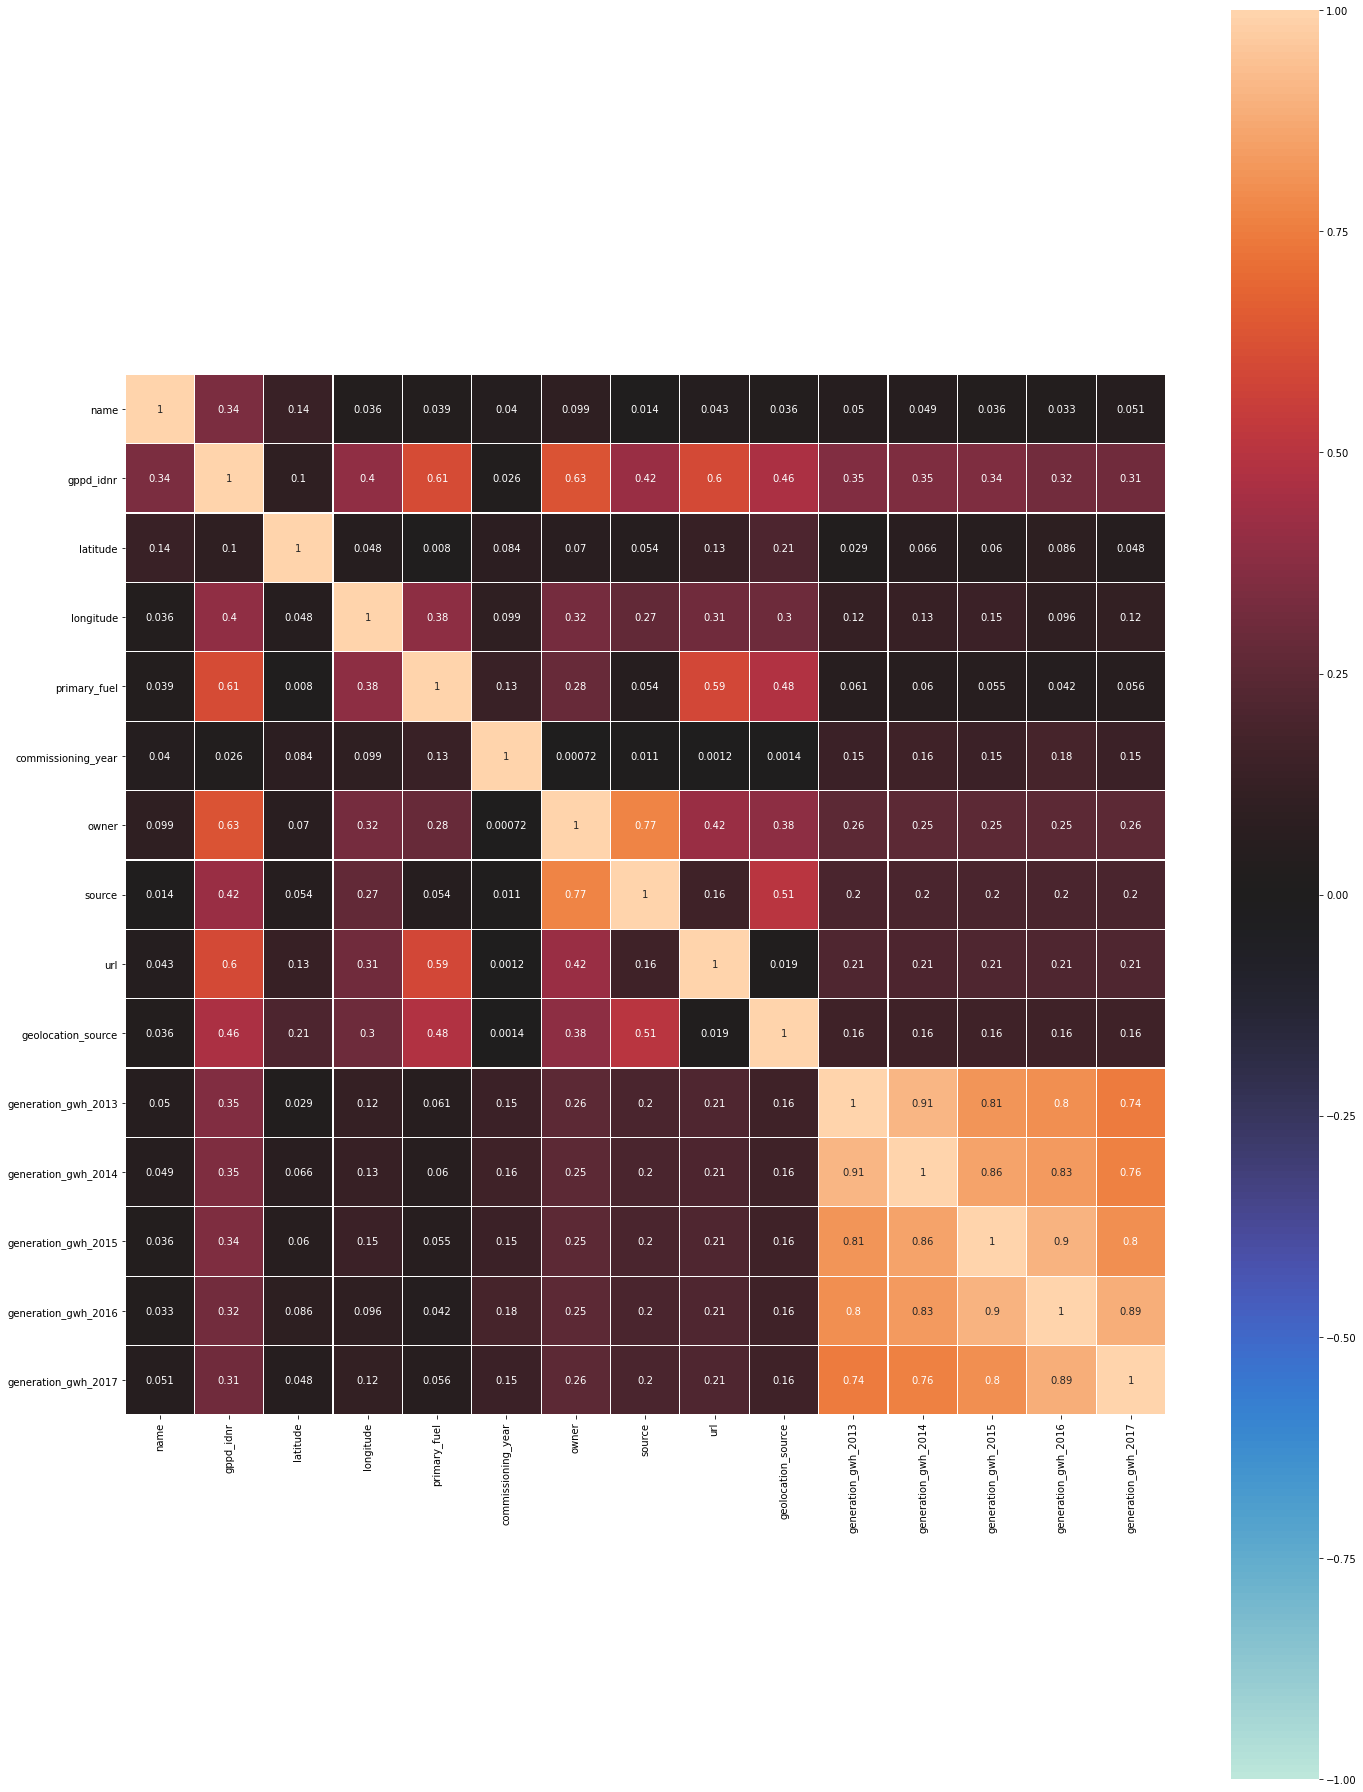

In [23]:
dt_corr = dt.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(dt_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Multicollinearity exists between the generation_gwh columns
##### Multicollinearity exists between owner and source, owner and gppd_idnr

#### Statistical analysis

In [24]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,453.50000,158.553965,413.745595,415.779736,51.322687,56.113436,43.823789,94.429515,1.733480,218.310573,218.219163,229.179515,230.988987,231.865639
std,262.26132,262.26132,109.077450,236.729988,233.906855,13.068155,82.501086,44.624092,70.352824,0.676835,81.876089,85.676691,92.523043,95.346961,97.237485
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,56.750000,214.750000,216.750000,51.000000,5.000000,22.000000,58.000000,2.000000,206.750000,199.750000,199.750000,196.750000,193.750000
50%,453.50000,453.50000,147.000000,391.500000,429.500000,51.000000,5.000000,22.000000,58.000000,2.000000,252.000000,253.000000,267.000000,270.000000,272.000000
75%,680.25000,680.25000,256.250000,614.250000,609.250000,58.000000,95.250000,29.250000,115.250000,2.000000,252.000000,253.000000,267.000000,270.000000,272.000000
max,907.00000,907.00000,364.000000,837.000000,828.000000,73.000000,279.000000,190.000000,303.000000,2.000000,364.000000,374.000000,398.000000,405.000000,410.000000


In [25]:
dt.describe()

,name,gppd_idnr,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,453.50000,413.745595,415.779736,3.205947,51.322687,56.113436,43.823789,94.429515,1.733480,218.310573,218.219163,229.179515,230.988987,231.865639
std,262.26132,262.26132,236.729988,233.906855,2.281339,13.068155,82.501086,44.624092,70.352824,0.676835,81.876089,85.676691,92.523043,95.346961,97.237485
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,226.75000,214.750000,216.750000,1.000000,51.000000,5.000000,22.000000,58.000000,2.000000,206.750000,199.750000,199.750000,196.750000,193.750000
50%,453.50000,453.50000,391.500000,429.500000,3.000000,51.000000,5.000000,22.000000,58.000000,2.000000,252.000000,253.000000,267.000000,270.000000,272.000000
75%,680.25000,680.25000,614.250000,609.250000,6.000000,58.000000,95.250000,29.250000,115.250000,2.000000,252.000000,253.000000,267.000000,270.000000,272.000000
max,907.00000,907.00000,837.000000,828.000000,7.000000,73.000000,279.000000,190.000000,303.000000,2.000000,364.000000,374.000000,398.000000,405.000000,410.000000


#### checking for outliers

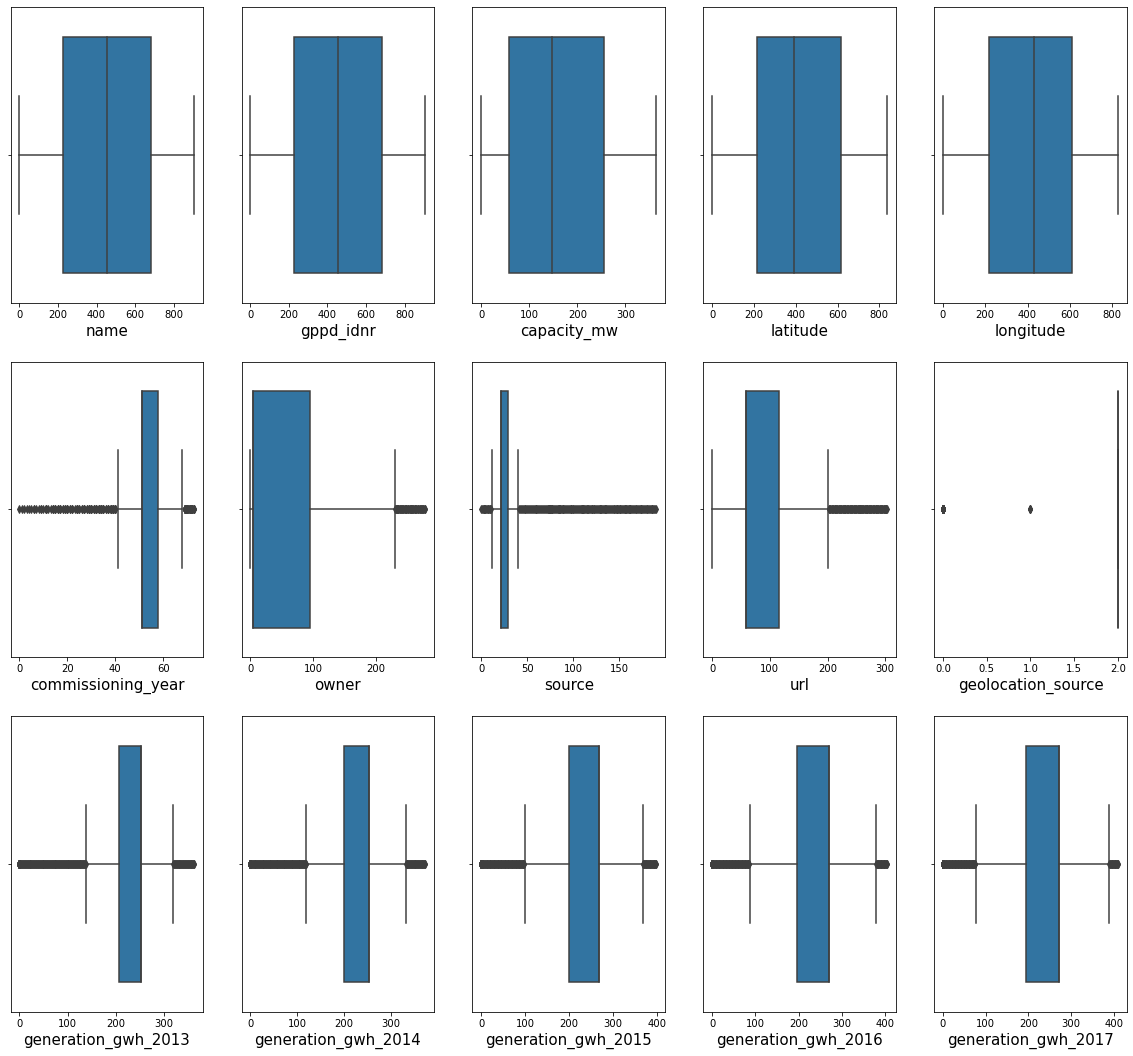

In [26]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=20:
        ax = plt.subplot(4,5,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

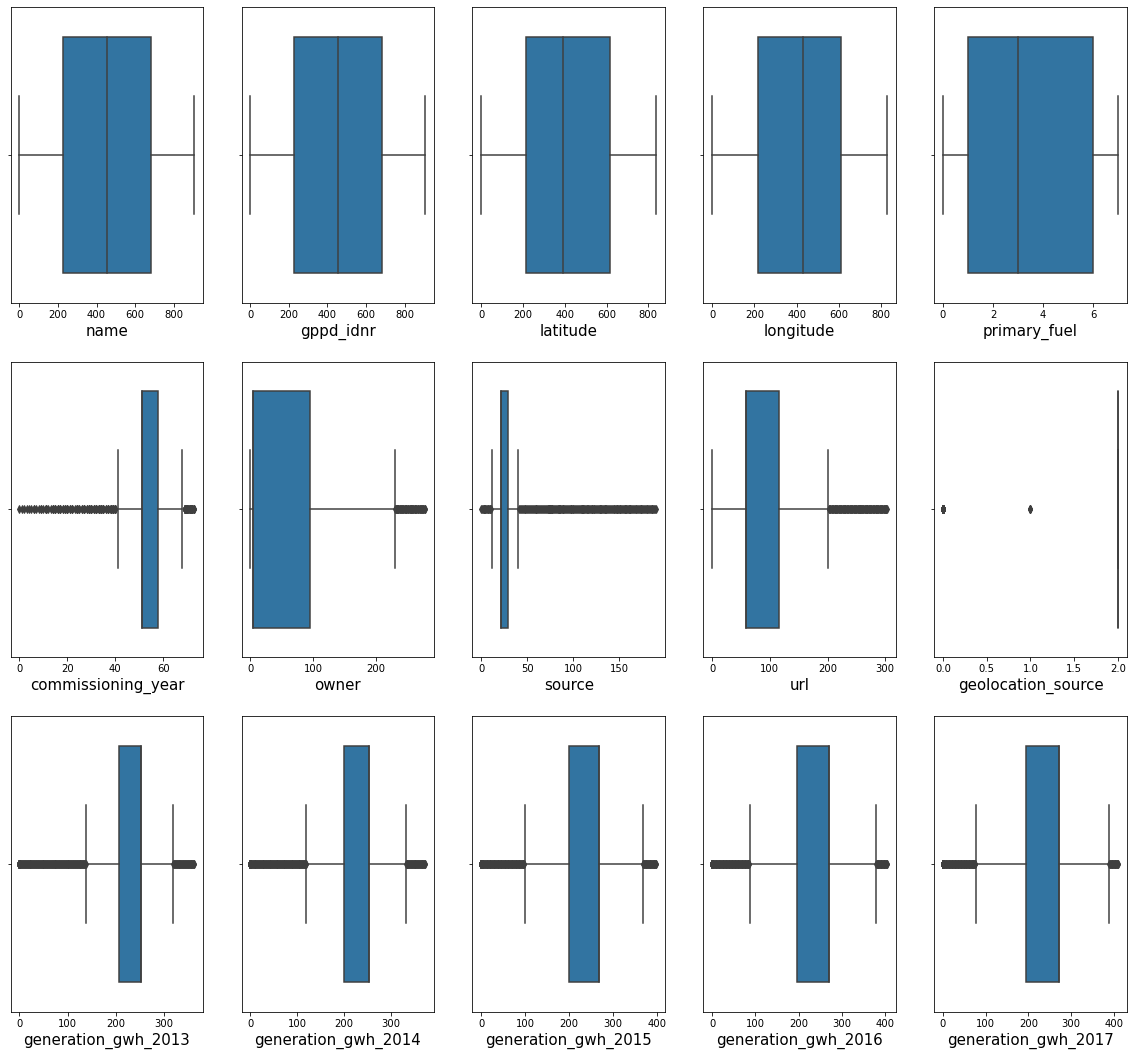

In [27]:
plt.figure(figsize=(20,25))
gr = 1
for column in dt:
    if gr<=20:
        ax = plt.subplot(4,5,gr)
        sns.boxplot(dt[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Checking for skewness

In [28]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            0.228620
latitude               0.038293
longitude             -0.035326
commissioning_year    -1.147820
owner                  1.366078
source                 1.829145
url                    1.512258
geolocation_source    -2.161710
generation_gwh_2013   -1.302485
generation_gwh_2014   -1.198721
generation_gwh_2015   -1.100938
generation_gwh_2016   -1.050854
generation_gwh_2017   -1.018356
dtype: float64

In [29]:
dt.skew()

name                   0.000000
gppd_idnr              0.000000
latitude               0.038293
longitude             -0.035326
primary_fuel           0.471141
commissioning_year    -1.147820
owner                  1.366078
source                 1.829145
url                    1.512258
geolocation_source    -2.161710
generation_gwh_2013   -1.302485
generation_gwh_2014   -1.198721
generation_gwh_2015   -1.100938
generation_gwh_2016   -1.050854
generation_gwh_2017   -1.018356
dtype: float64

#### Removing outliers by z score method

In [30]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print("---------------------------------------------------------")
print(z)
print("----------------------------------------------------------")
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("-----------------------------------------------------------")
print("New shape : ",df1.shape)

Old shape :  (908, 15)
---------------------------------------------------------
[[1.73014431 0.78018635 1.37183612 ... 0.40899355 0.40937344 0.41297325]
 [1.72632922 0.25370363 0.19672127 ... 0.40899355 0.40937344 0.41297325]
 [1.72251413 1.52794443 0.33530404 ... 0.40899355 0.40937344 0.41297325]
 ...
 [1.72251413 1.67291793 0.7113909  ... 0.40899355 0.40937344 0.41297325]
 [1.72632922 0.33000548 0.09581992 ... 0.40899355 0.40937344 0.41297325]
 [1.73014431 1.61569155 0.94071216 ... 0.40899355 0.40937344 0.41297325]]
----------------------------------------------------------
Row numbers :  [ 72  81 192 222 300 322 343 346 372 445 455 479 485 539 542 575 584 593
 602 622 662 670 690 707 710 729 808 833 849 871 872 880 896 901]
Column numbers :  [ 72  81 192 222 300 322 343 346 372 445 455 479 485 539 542 575 584 593
 602 622 662 670 690 707 710 729 808 833 849 871 872 880 896 901]
-----------------------------------------------------------
New shape :  (874, 15)


In [31]:
from scipy.stats import zscore
z = np.abs(zscore(dt))
print("Old shape : ",z.shape)
print("---------------------------------------------------------")
print(z)
print("----------------------------------------------------------")
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
dt1 = dt.drop(dt.index[index])
print("-----------------------------------------------------------")
print("New shape : ",dt1.shape)

Old shape :  (908, 15)
---------------------------------------------------------
[[1.73014431 0.78018635 1.34089159 ... 0.40899355 0.40937344 0.41297325]
 [1.72632922 0.25370363 0.76185424 ... 0.40899355 0.40937344 0.41297325]
 [1.72251413 1.52794443 0.03066111 ... 0.40899355 0.40937344 0.41297325]
 ...
 [1.72251413 1.67291793 1.10628083 ... 0.40899355 0.40937344 0.41297325]
 [1.72632922 0.33000548 0.66887015 ... 0.40899355 0.40937344 0.41297325]
 [1.73014431 1.61569155 1.61346682 ... 0.40899355 0.40937344 0.41297325]]
----------------------------------------------------------
Row numbers :  [ 72  81 192 222 300 322 343 346 372 445 455 479 485 539 542 575 584 593
 602 622 662 670 690 707 710 729 808 833 849 871 872 880 896 901]
Column numbers :  [ 72  81 192 222 300 322 343 346 372 445 455 479 485 539 542 575 584 593
 602 622 662 670 690 707 710 729 808 833 849 871 872 880 896 901]
-----------------------------------------------------------
New shape :  (874, 15)


#### Data loss in percentage

In [32]:
loss = (908-874)/908*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  3.7444933920704844 % of data


#### Predicting for 'capacity_mw'

#### Splitting the dataset into target and feature variable

In [33]:
x = df1.drop('capacity_mw',axis=1)
y = df1['capacity_mw']

#### Removing skewness

In [34]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-2.16892496,  0.788271  ,  1.2569002 , ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [-2.14869699,  0.33502413,  0.7768646 , ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [-2.13145162,  1.38634279,  0.12249241, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       ...,
       [ 1.55433517,  1.49734919, -1.08860791, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [ 1.55722564,  0.40273527,  0.69699022, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [ 1.56011515,  1.45370124, -1.84409098, ...,  0.37367717,
         0.3781017 ,  0.38458309]])

#### Checking skewness again

In [35]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

name                  -0.284622
gppd_idnr             -0.293802
latitude              -0.268785
longitude             -0.298268
commissioning_year     0.001005
owner                  0.460179
source                -0.207029
url                    0.066840
geolocation_source    -2.140385
generation_gwh_2013   -0.807991
generation_gwh_2014   -0.818194
generation_gwh_2015   -0.788150
generation_gwh_2016   -0.785978
generation_gwh_2017   -0.789427
dtype: float64

#### Still skewness exists

#### Visualizing the Distribution

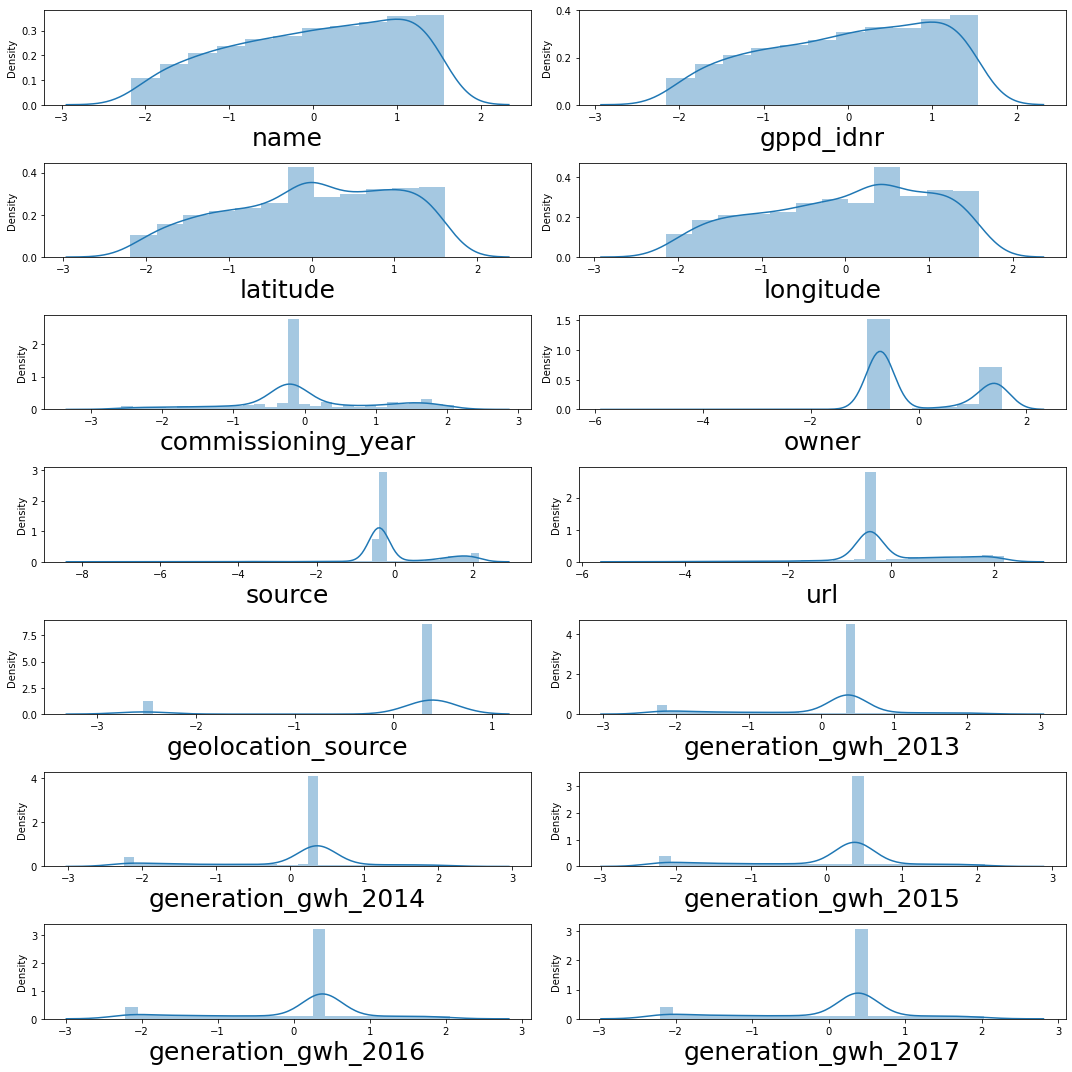

In [36]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber=1
for column in x_new:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(x_new[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### Scaling X

In [37]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

#### Performing PCA as multicollinearity exists

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(x_new.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.621674,name
1,4.392493,gppd_idnr
2,1.159104,latitude
3,1.342368,longitude
4,1.087076,commissioning_year
5,4.218644,owner
6,2.339479,source
7,1.503856,url
8,1.768091,geolocation_source
9,6.804219,generation_gwh_2013


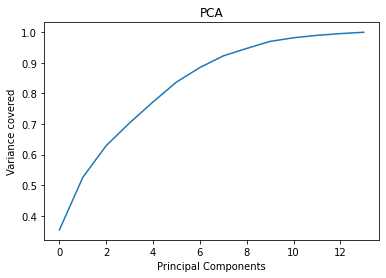

In [39]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [40]:
pca = PCA(n_components=11)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-2.183781,-2.081543,-2.979107,-0.040563,-1.215467,-1.173170,0.600640,0.687109,-0.009356,-0.148516,0.041045
1,-1.679437,-1.487839,-1.520968,-1.638583,-1.766520,-0.399151,-1.022657,-0.646259,-0.305182,0.145121,-0.014827
2,-0.877626,0.042146,-0.153974,-2.493933,0.544811,-2.106578,0.995421,0.214589,0.010982,-0.324183,-0.269136
3,2.503674,1.617961,-1.811429,-0.746856,-1.399687,0.012882,-0.403774,0.665879,0.224111,0.154170,-0.258449
4,-0.799237,3.356597,-1.729717,-0.585574,-1.870447,-0.248586,0.458515,0.281312,0.885687,0.406186,-0.591398
...,...,...,...,...,...,...,...,...,...,...,...
869,1.618865,0.254558,1.407241,2.039371,-0.394536,-0.603887,0.917877,-0.367760,-0.760374,-1.036088,1.787268
870,-1.720131,-1.628308,0.148786,2.385801,0.202473,2.554012,1.075085,0.743559,0.202838,-0.098117,-0.058958
871,-1.161811,-0.335839,2.737098,-0.079781,0.520313,-0.984078,-0.038665,0.342057,0.491219,-0.556002,-0.139399
872,-1.484449,-1.027542,0.341160,0.666624,0.583478,-0.045971,-0.821072,-1.541330,-0.041630,0.213684,0.118192


#### Finding best random state

In [41]:
max_score = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test,y_pred)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.6555633460782682 when 85 is the random state


In [42]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 85)

In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score is: ",r2_score(y_test,y_pred))

Score in training dataset =  0.49714372943292584
Score in testing dataset =  0.6555633460782682
MAE is :  51.31397536229436
MSE is : 4267.476695128333
RMSE is : 65.32592666873033
R2 score is:  0.6555633460782682


In [44]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Score in training dataset is  1.0
Score in testing dataset is  0.5460863011779378
MAE is :  52.64383561643836
MSE is : 5623.867579908676
RMSE is : 74.99245015272321


In [45]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Score in training dataset is  0.9640071195599108
Score in testing dataset is  0.8126880022404623
MAE is :  36.50593607305936
MSE is : 2320.744833789954
RMSE is : 48.17410957962746


In [46]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Score in training dataset is  0.8869780792466809
Score in training dataset is  0.794087138729588
MAE is :  38.81043621128367
MSE is : 2551.2044862053344
RMSE is : 50.50944947438384


In [47]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))

Score in training dataset is  0.9997191088056034
Score in training dataset is  0.7536256075742278
MAE is :  40.86198774973551
MSE is : 3052.5118798544017
RMSE is : 55.24954189723569


In [48]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("Score in training dataset is ",knn.score(x_train,y_train))
print("Score in training dataset is ",knn.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_knn))
print("MSE is :",mean_squared_error(y_test,y_pred_knn))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Score in training dataset is  0.7621699417582624
Score in training dataset is  0.7058578848724562
MAE is :  44.989041095890414
MSE is : 3644.3410045662104
RMSE is : 60.36837752139948


#### Cross-validating

In [49]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(lr,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of LR model is : ",cvs)

Cross validation score of LR model is :  0.5257272068802074


In [50]:
cvs = cross_val_score(dt,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  0.439487801687655


In [51]:
cvs = cross_val_score(rf,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  0.7402956910542761


In [52]:
cvs = cross_val_score(gbr,principal_x,y,cv=5)
print("Cross validation score of GradientDescent Boosting model is : ",cvs.mean())

Cross validation score of GradientDescent Boosting model is :  0.6802193262968173


In [53]:
cvs = cross_val_score(xgbr,principal_x,y,cv=5)
print("Cross validation score of XGBRegressor model is : ",cvs.mean())

Cross validation score of XGBRegressor model is :  0.7041656596673933


In [54]:
cvs = cross_val_score(knn,principal_x,y,cv=5)
print("Cross validation score of KNN Regressor model is : ",cvs.mean())

Cross validation score of KNN Regressor model is :  0.6311751259714355


#### Finding the model

In [55]:
models = pd.DataFrame({
    "Model":["Linear regression","Decision Tree","Random Forest","GradientBoosting","XGBoost","KNN"],
    "Accuracy Score":["65.56",'54.61','81.27','79.41','75.36','70.59'],
    "Cross Validation score":['52.57','43.95','74.03','68.02','70.42','63.12'],
    "Difference":['12.99','10.66','7.24','11.39','4.94','7.47']
})
models

,Model,Accuracy Score,Cross Validation score,Difference
0,Linear regression,65.56,52.57,12.99
1,Decision Tree,54.61,43.95,10.66
2,Random Forest,81.27,74.03,7.24
3,GradientBoosting,79.41,68.02,11.39
4,XGBoost,75.36,70.42,4.94
5,KNN,70.59,63.12,7.47


#### XGBoost works best for predicting capacity_mw

#### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':[0.05,0.2,0.01],
          'n_estimators':[10,200,5],
          'max_depth':[2,12,1],
          'min_child_weight':[1,10,1],
          'max_leaf_nodes':[1,10,1]
         }
grid = GridSearchCV(estimator = xgbr,param_grid = params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[11:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Parameters are 
 {'learning_rate': 0.05, 'max_depth': 12, 'max_leaf_nodes': 1, 'min_child_weight': 10, 'n_estimators': 200}


In [57]:
gbr = XGBRegressor(learning_rate=0.05,max_depth=12,min_child_weight=10,max_leaf_nodes=1,n_estimators=200)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

[11:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Score in training dataset is  0.9915789540107183
Score in training dataset is  0.8021547043564634
MAE is :  36.78010276898946
MSE is : 2451.2495368493
RMSE is : 49.51009530236536


#### GradientBoosting Regressor works with an accuracy of 80.22%

#### Saving the model

In [58]:
filename = 'capacity_prediction.pkl'
pickle.dump(lr,open(filename,'wb'))

### Predicting fuel_type

#### Splitting into feature and target variable

In [59]:
x = dt1.drop("primary_fuel",axis=1)
y = dt1['primary_fuel']

#### Removing skewness

In [60]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-2.16892496,  0.788271  ,  1.2569002 , ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [-2.14869699,  0.33502413,  0.7768646 , ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [-2.13145162,  1.38634279,  0.12249241, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       ...,
       [ 1.55433517,  1.49734919, -1.08860791, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [ 1.55722564,  0.40273527,  0.69699022, ...,  0.37367717,
         0.3781017 ,  0.38458309],
       [ 1.56011515,  1.45370124, -1.84409098, ...,  0.37367717,
         0.3781017 ,  0.38458309]])

In [61]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

name                  -0.284622
gppd_idnr             -0.293802
latitude              -0.268785
longitude             -0.298268
commissioning_year     0.001005
owner                  0.460179
source                -0.207029
url                    0.066840
geolocation_source    -2.140385
generation_gwh_2013   -0.807991
generation_gwh_2014   -0.818194
generation_gwh_2015   -0.788150
generation_gwh_2016   -0.785978
generation_gwh_2017   -0.789427
dtype: float64

#### Still skewness exists

### Scaling the data

In [62]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

#### Checking multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(x_new.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.621674,name
1,4.392493,gppd_idnr
2,1.159104,latitude
3,1.342368,longitude
4,1.087076,commissioning_year
5,4.218644,owner
6,2.339479,source
7,1.503856,url
8,1.768091,geolocation_source
9,6.804219,generation_gwh_2013


##### Applying PCA 

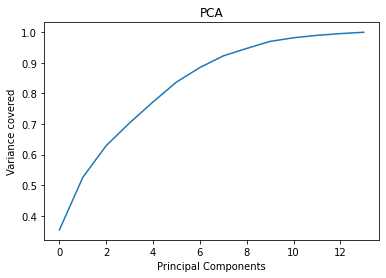

In [64]:
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [65]:
pca = PCA(n_components=11)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-2.183781,-2.081543,-2.979107,-0.040563,-1.215467,-1.173170,0.600640,0.687109,-0.009356,-0.148516,0.041045
1,-1.679437,-1.487839,-1.520968,-1.638583,-1.766520,-0.399151,-1.022657,-0.646259,-0.305182,0.145121,-0.014827
2,-0.877626,0.042146,-0.153974,-2.493933,0.544811,-2.106578,0.995421,0.214589,0.010982,-0.324183,-0.269136
3,2.503674,1.617961,-1.811429,-0.746856,-1.399687,0.012882,-0.403774,0.665879,0.224111,0.154170,-0.258449
4,-0.799237,3.356597,-1.729717,-0.585574,-1.870447,-0.248586,0.458515,0.281312,0.885687,0.406186,-0.591398
...,...,...,...,...,...,...,...,...,...,...,...
869,1.618865,0.254558,1.407241,2.039371,-0.394536,-0.603887,0.917877,-0.367760,-0.760374,-1.036088,1.787268
870,-1.720131,-1.628308,0.148786,2.385801,0.202473,2.554012,1.075085,0.743559,0.202838,-0.098117,-0.058958
871,-1.161811,-0.335839,2.737098,-0.079781,0.520313,-0.984078,-0.038665,0.342057,0.491219,-0.556002,-0.139399
872,-1.484449,-1.027542,0.341160,0.666624,0.583478,-0.045971,-0.821072,-1.541330,-0.041630,0.213684,0.118192


#### Finding the best random state

In [66]:
from sklearn.linear_model import LogisticRegression
max_accuracy = 0
max_rs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.817351598173516 when 26 is the random state


#### Splitting into train and test data

In [67]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 26)

#### Model Training

#### i) Logistic regression

In [68]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.8127853881278538
Confusion Matrix 
 [[ 8  4  0  0  0  0  0  2]
 [ 1 53  0 10  0  0  0  1]
 [ 1  3  2  8  0  0  0  1]
 [ 0  6  0 49  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  2  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 27]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.78      0.82      0.80        65
           2       1.00      0.13      0.24        15
           3       0.71      0.89      0.79        55
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       1.00      0.95      0.97        40
           7       0.87      1.00      0.93        27

    accuracy                           0.81       219
   macro avg       0.77      0.67      0.67       219
weighted avg       0.82      0.81      0.79       219



#### DecisionTree Classifier

In [69]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.7397260273972602
Confusion Matrix 
 [[ 6  5  1  0  0  0  2  0]
 [ 3 48  5  5  0  1  3  0]
 [ 1  2  5  4  0  2  0  1]
 [ 0  3  4 47  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 1  3  0  1  0  0 32  3]
 [ 0  0  0  1  0  1  1 24]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.55      0.43      0.48        14
           1       0.79      0.74      0.76        65
           2       0.29      0.33      0.31        15
           3       0.80      0.85      0.82        55
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.84      0.80      0.82        40
           7       0.86      0.89      0.87        27

    accuracy                           0.74       219
   macro avg       0.52      0.51      0.51       219
weighted avg       0.75      0.74      0.74       219



#### Random Forest Classifier

In [70]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.8493150684931506
Confusion Matrix 
 [[ 8  4  1  0  0  0  1  0]
 [ 1 56  2  4  0  1  0  1]
 [ 1  2  6  5  0  1  0  0]
 [ 0  3  1 51  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  3  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 27]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.82      0.86      0.84        65
           2       0.55      0.40      0.46        15
           3       0.84      0.93      0.88        55
           4       0.00      0.00      0.00         2
           5       0.33      1.00      0.50         1
           6       0.97      0.93      0.95        40
           7       0.96      1.00      0.98        27

    accuracy                           0.85       219
   macro avg       0.66      0.71      0.66       219
weighted avg       0.84      0.85      0.84       219



#### SVC

In [71]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
conf_mat = confusion_matrix(y_test,y_pred_svc)
classification_rep = classification_report(y_test,y_pred_svc)
print("Accuracy of SVC model is ",svc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of SVC model is  0.8310502283105022
Confusion Matrix 
 [[ 9  5  0  0  0  0  0  0]
 [ 1 55  0  9  0  0  0  0]
 [ 1  2  0 11  0  0  0  1]
 [ 0  2  0 53  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 27]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.82      0.85      0.83        65
           2       0.00      0.00      0.00        15
           3       0.71      0.96      0.82        55
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      0.95      0.97        40
           7       0.96      1.00      0.98        27

    accuracy                           0.83       219
   macro avg       0.54      0.55      0.54       219
weighted avg       0.77      0.83      0.80       219



#### XGBoost Classifier

In [72]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[11:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.821917808219178
Confusion Matrix 
 [[ 8  6  0  0  0  0  0  0]
 [ 1 55  4  3  0  1  0  1]
 [ 1  1  6  5  0  1  0  1]
 [ 0  6  1 47  0  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  3  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 27]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.77      0.85      0.81        65
           2       0.46      0.40      0.43        15
           3       0.84      0.85      0.85        55
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1


#### Cross-Validating

In [73]:
cvs = cross_val_score(lr,X_scaled,y,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7414121510673235


In [74]:
cvs = cross_val_score(dt,X_scaled,y,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.7676256157635468


In [75]:
cvs = cross_val_score(rf,X_scaled,y,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.8272446633825943


In [76]:
cvs = cross_val_score(svc,X_scaled,y,cv=5)
print("Cross validation score of SVC is : ",cvs.mean())

Cross validation score of SVC is :  0.7723349753694582


In [77]:
cvs = cross_val_score(xgbc,X_scaled,y,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[11:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

#### Finding the best model

In [78]:
model = pd.DataFrame([["Logistic Regression","81.28","74.14","7.14"],["DecisionTreeClassifier","73.97","76.76","2.79"],["RandomForestClassifier","84.93","82.72","2.21"],["SVC","83.11","77.23","5.88"],["XGBoostClassifier","82.19","83.29","1.1"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,81.28,74.14,7.14
1,DecisionTreeClassifier,73.97,76.76,2.79
2,RandomForestClassifier,84.93,82.72,2.21
3,SVC,83.11,77.23,5.88
4,XGBoostClassifier,82.19,83.29,1.1


#### Taking XGBoost classifier as the best model as the difference is less

#### Hyper parameter Tuning

In [79]:
params = {'learning_rate':[0.05,0.2,0.01],
          'n_estimators':[10,200,5],
          'max_depth':[2,12,1],
          'min_child_weight':[1,10,1],
          'max_leaf_nodes':[1,10,1]
         }
grid = GridSearchCV(estimator = xgbc,param_grid = params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[11:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters are 
 {'learning_rate': 0.05, 'max_depth': 12, 'max_leaf_nodes': 1, 'min_child_weight': 10, 'n_estimators': 200}


In [91]:
xgbc = XGBClassifier(learning_rate=0.027,max_depth=12,min_child_weight=10,n_estimators=200)
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[11:24:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8264840182648402
Confusion Matrix 
 [[ 9  5  0  0  0  0  0  0]
 [ 0 58  1  4  0  1  0  1]
 [ 1  1  4  8  0  0  0  1]
 [ 0  7  1 47  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  2  0  0  0  0 38  0]
 [ 0  2  0  0  0  0  0 25]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.90      0.64      0.75        14
           1       0.77      0.89      0.83        65
           2       0.50      0.27      0.35        15
           3       0.78      0.85      0.82        55
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

#### After hyperparameter tuning accuracy increase to 82.64%

#### Plotting ROC curve

In [353]:
!pip install scikit-plot

In [92]:
import scikitplot as skplt

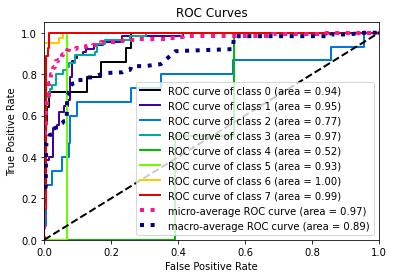

In [93]:
prob = xgbc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,prob)
plt.show()

In [94]:
filename = 'fuel_type.pkl'
pickle.dump(lr,open(filename,'wb'))